INTAROS - IMR Dataset - RGeostats Workshop Course
============================

**authors**: D. Renard, F. Ors

**date**: January 22nd 2019

# Introduction

This paper is meant to demonstrate how to use some scripts to learn on how to use **Geostatistics**. This case study is based on the use of **RGeostats** and scripts developed in the scope of **Intaros** workshop. 
This notebook has been obtained by running the following command:

<pre>notedown rmd/geostats_course.Rmd --rmagic > geostats_course.ipynb</pre>

The next cells have specific contents that the user must choose to run or to skip. Their order is important.

- Loading the library **Intaros** and cancel any possible projection

In [1]:
suppressWarnings(suppressPackageStartupMessages(library(RIntaros)))
projec.toggle(0)

- Cleaning the workspace: this paragraph is not systematically performed.

In [2]:
rm(list=ls())

## Loading Data

It is based on the **Annual CTD datasets** from Norwegion Institute of Marine Research (IMR). For better efficiency, the dataset has been simplified by:

- reducing the values when the depth lies between 0m and 100m
- regrouping (and averaging) the data by benches of 10m high
- the data set is read from a CSV external file

In [38]:
dir.name   = getwd()
data.name  = "data"

# 2003 Subset
file.name  = "filtered_AA_TEMP_CNDC_PSAL_0-100m.csv"
long_lim   = c(-5,15)
lat_lim    = c(50,60)

# ARMINES
# file.name  = "imr_data_by_10m.csv"
# long_lim   = c(-2,10)
# lat_lim    = c(56,62)

db0        = imr_read_csv(file.path(dir.name,data.name,file.name))

image.name = "images"
intaros.save.environ(long_lim = long_lim, lat_lim = lat_lim,
                     flag_file = FALSE)#,image_name = file.path(dir.name,image.name))

# Basic statistics

This paragraph allows the user to check some functions for getting basic statistics, such as:

- defining global information: sampling duration, color setting

In [14]:
years      = subyears = get_db_limits_year(db0)
trimesters = subtrims = seq(1,4)
colyears   = rg.colors(length(years))
cat(build_title("The dataset period is:",time2date(get_db_limits_time(db0))))

The dataset period is: (2003-01-12 => 2003-01-28)

- check the contents of the data base

In [15]:
db0


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of fields             = 8
Maximum Number of attributes = 8
Total number of samples      = 8787

Variables
---------
Field =   1 - Name    =  rank - Locator =  NA
Field =   2 - Name    =  Longitude - Locator =  x1
Field =   3 - Name    =  Latitude - Locator =  x2
Field =   4 - Name    =  Time - Locator =  NA
Field =   5 - Name    =  Temperature - Locator =  NA
Field =   6 - Name    =  Conductivity - Locator =  NA
Field =   7 - Name    =  Salinity - Locator =  NA
Field =   8 - Name    =  Depth - Locator =  NA

- getting some basic statistics on the different variables

In [16]:
db.stat.print(db0,funs=c("num","mini","maxi","mean"),
              names=c("Longitude","Latitude","Depth","Temperature","Conductivity","Salinity"))

                Number   Minimum   Maximum      Mean
Longitude         8787    -1.466     8.556     3.909
Latitude          8787    56.676    59.717    58.058
Depth             8787     0.000   100.000    50.000
Temperature       6831     3.769     9.204     7.120
Conductivity      6831    30.460    37.688    35.219
Salinity          6831    32.269    35.333    34.776



- display of the data (all data, for all years and all depths)

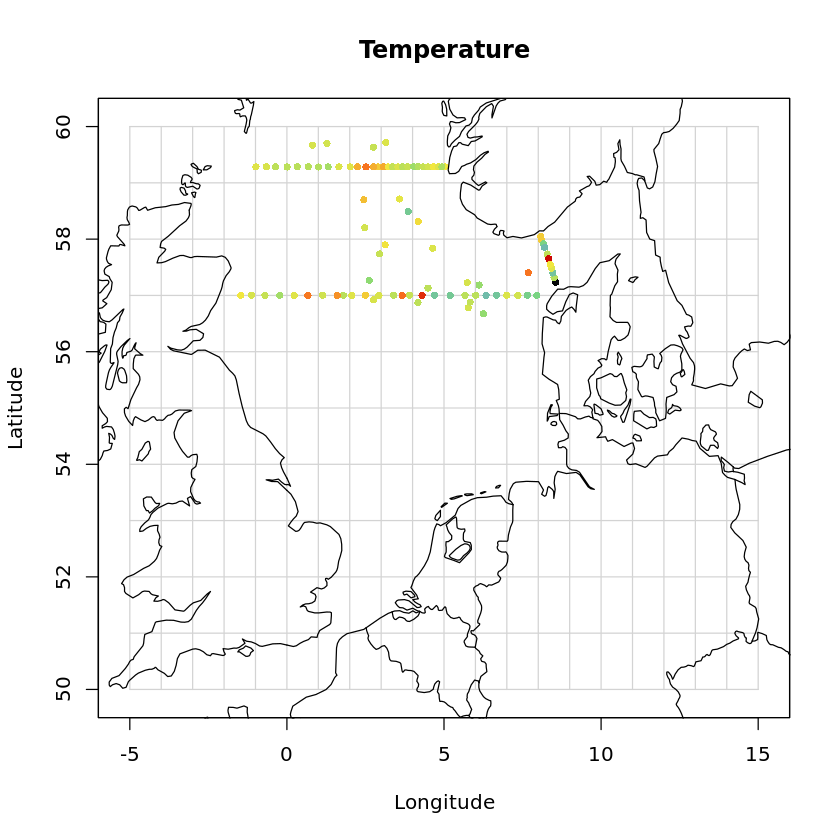

In [17]:
var = "Temperature"
colors.temp = rg.colors(rank=1)
colors.std  = heat.colors(100)
var_scale0 = get_db_limits_var(db0,var)
display_var(db0, var = var, var_scale = var_scale0, colors = colors.temp, title = var, 
            filename = var, flag.mesh = TRUE, mesh = 1, flag.coast = TRUE)

- histogram of Temperature

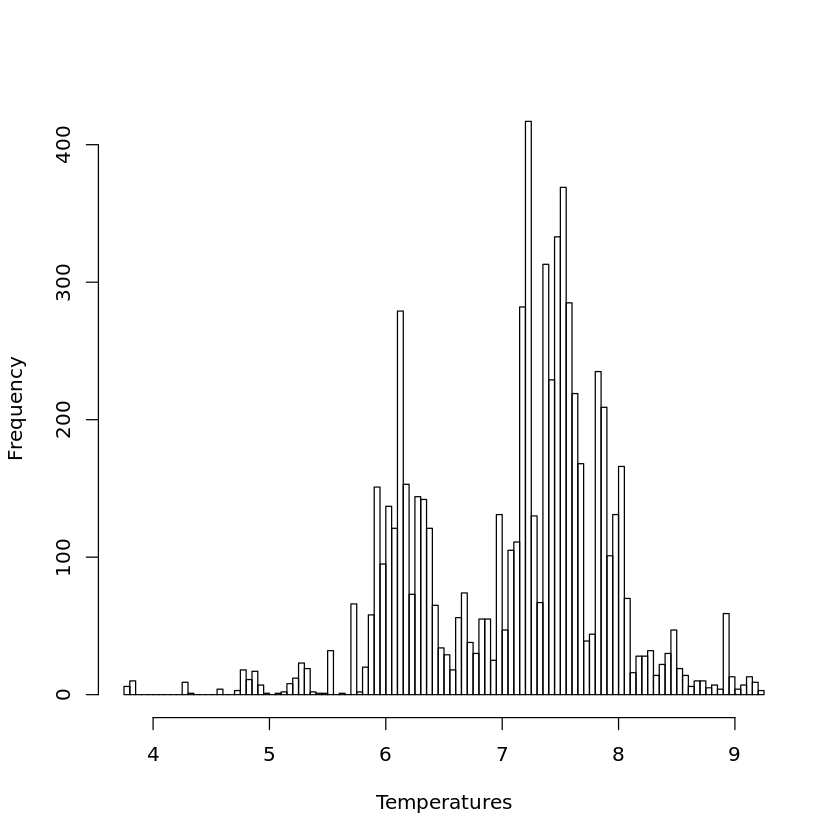

In [18]:
hist(db0[,"Temp*"],breaks=100,xlab="Temperatures",main="")

- correlation between variables

Correlation coefficient= 0.6017874 


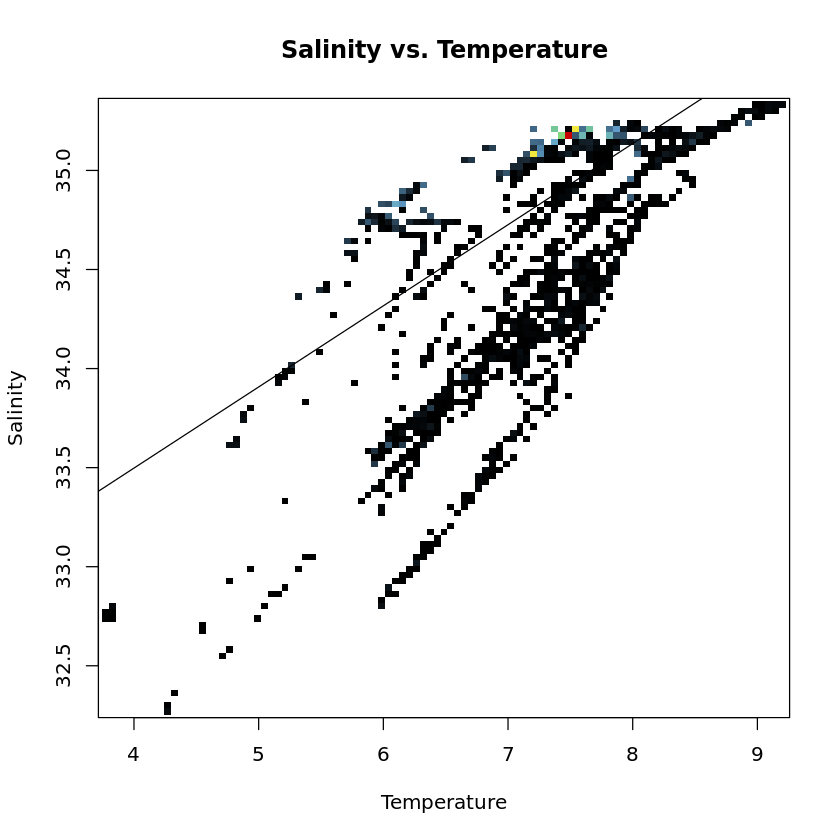

In [19]:
rho = correlation(db0,"Temperature","Salinity",title="Salinity vs. Temperature",flag.regr=TRUE)
cat("Correlation coefficient=",rho,"\n")

- range of depths

In [20]:
db.print(db0,names="Depth",flag.stats=TRUE)


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of fields             = 8
Maximum Number of attributes = 8
Total number of samples      = 8787

Data Base Statistics
--------------------
8 - Locator Variable NA (Name=Depth) 
 Nb of data          =       8787
 Nb of active values =       8787
 Minimum value       =      0.000
 Maximum value       =    100.000
 Mean value          =     50.000
 Standard Deviation  =     29.155
 Variance            =    850.000


We also learn how to apply some statistics on a sub-sample by performing a **selection**. The argument **var_scale** is defined to set the range of values used for color rendition.

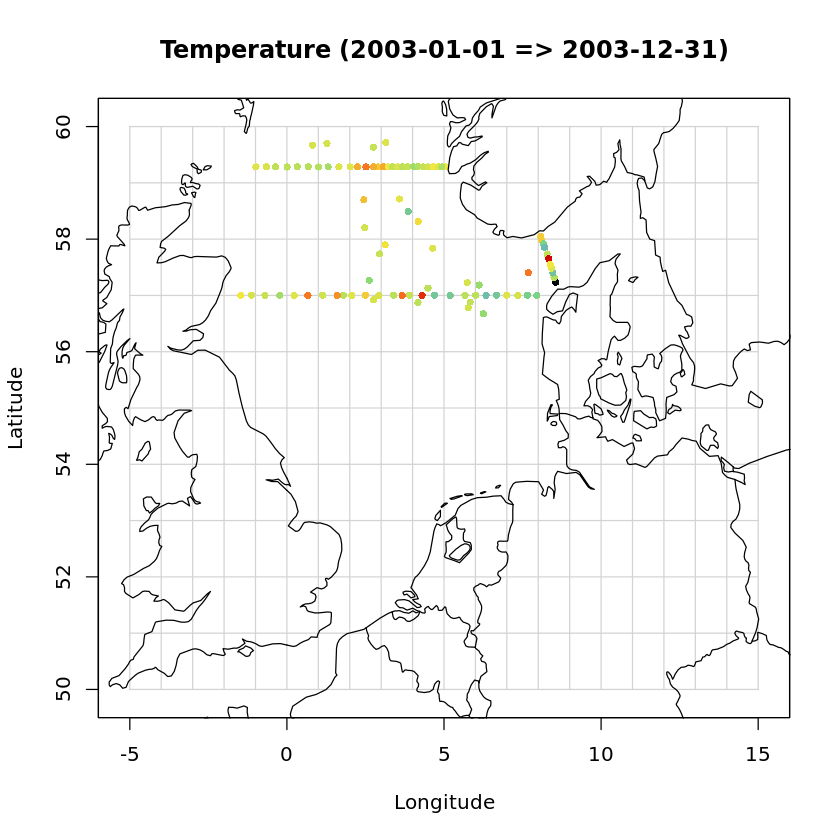

In [21]:
var       = "Temperature"
year      = 2003
date_lim  = create_limits_date(year)
db        = apply_sel(db0, date_lim=date_lim)
var_scale = get_db_limits_var(db,var)
title     = build_title(var, date_lim)
filename  = paste0(var,"_Year_",year)
  
display_var(db, var, var_scale = var_scale, colors = colors.temp,
            title = title, filename = filename,
            flag.mesh = TRUE, mesh = 1, flag.coast = TRUE)

- statistics per block (on the same selection as before)

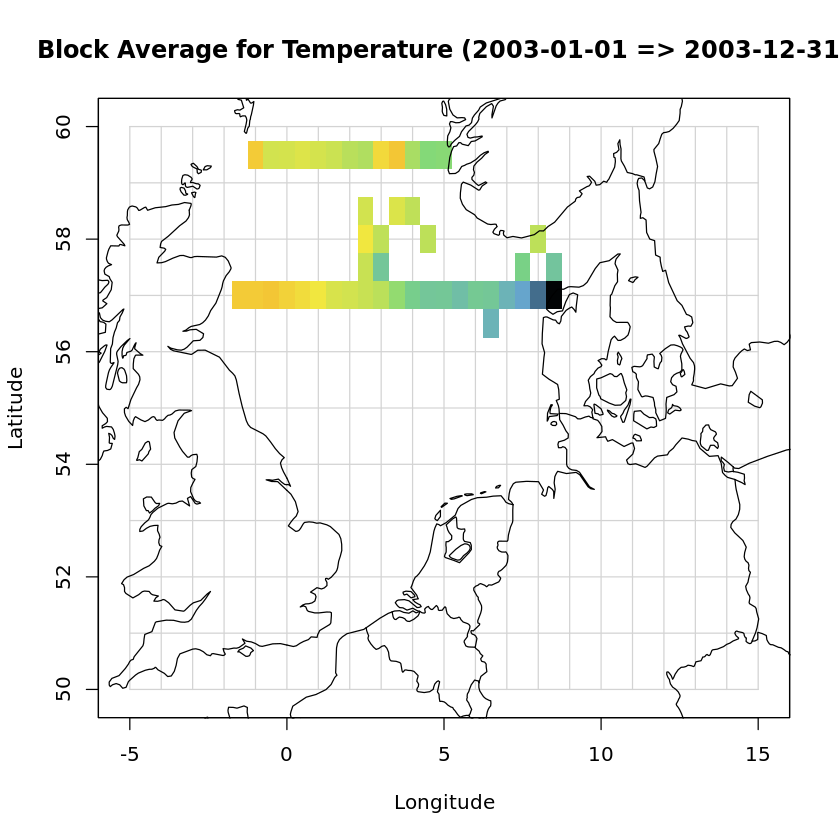

In [22]:
var       = "Temperature"
year      = 2003
date_lim  = create_limits_date(year)
db        = apply_sel(db0, date_lim = date_lim)
var_scale = get_db_limits_var(db,var)
title     = paste("Block Average for", build_title(var, date_lim))
dbg       = stats_grid(db, var, fun = "mean", mesh = 0.5, verbose = FALSE)
filename  = paste0(var,"_Year_",year)

display_stats(dbg, var, var_scale = var_scale, colors = colors.temp,
              title = title, filename = filename,
              flag.mesh = TRUE, mesh = 1, flag.coast = TRUE)

- calculating the mean and variance for each year, at 25m depth

In [37]:
var = 'Salinity'
average_time(db , var, years)

$count
[1] 8787

$means
[1] NA

$vars
[1] NA

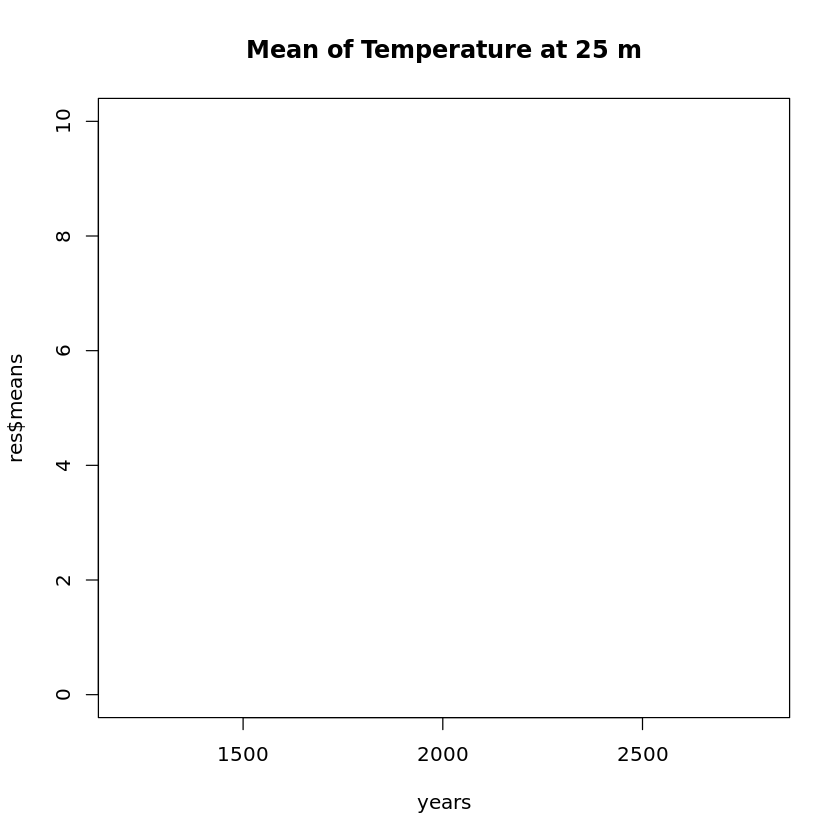

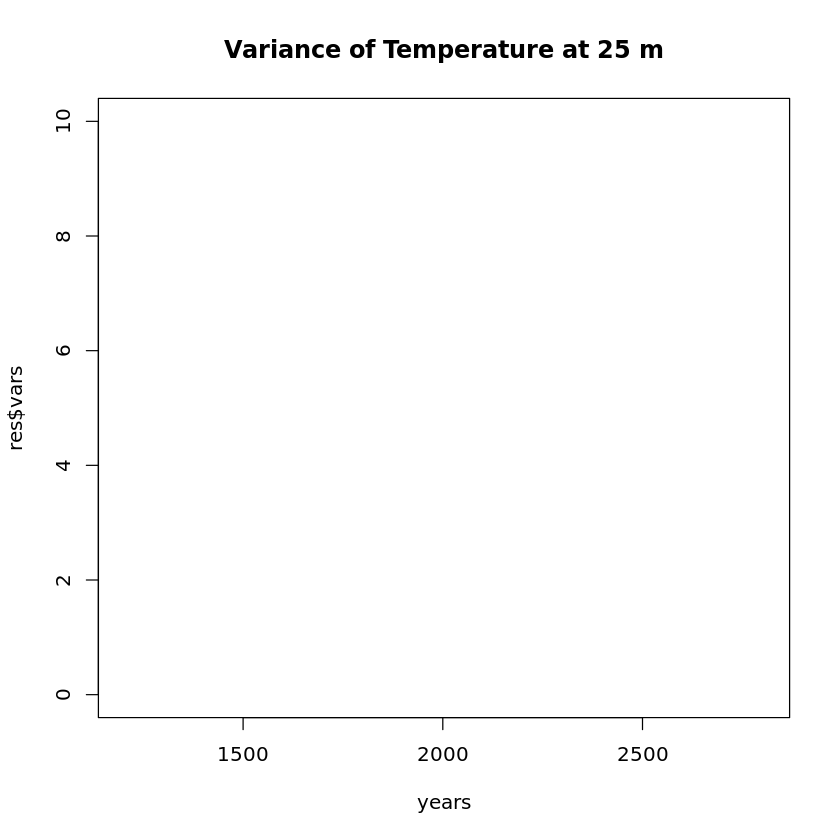

In [30]:
var       = "Temperature"
depth     = 25

# Select the active samples
depth_lim = c(depth,depth)
db        = apply_sel(db0, depth_lim = depth_lim)

# Average Temperature along Time
res       = average_time(db , var, years)

# Display results
plot(years,res$means,type="b",main=paste("Mean of",var,"at",depth,"m"),
     pch=15,lty=1,col=colyears)#, ylim=range(0,10))
plot(years,res$vars ,type="b",main=paste("Variance of",var,"at",depth,"m"),
     pch=15,lty=1,col=colyears)#, ylim=range(0,10))

- calculating the mean and variance (for 2008) for each depth level (every 10m)

In [ ]:
var       = "Temperature"
year      = 2008

# Select the active samples
date_lim  = create_limits_date(year)
db        = apply_sel(db0, date_lim = date_lim)

# Average Temperature along Depth
res       = average_depth(db , var, depth0=0, ddepth=10, ndepth=10)

# Display the results
plot(res$count,res$depths,type="b",main=paste("Number of samples for",var),pch=19,
     xlab="Count of Samples", ylab="Depth", ylim=rev(range(res$depths)))
plot(res$means,res$depths,type="b",main=paste("Mean for",var),pch=19,
     xlab="Mean", ylab="Depth", ylim=rev(range(res$depths)))
plot(res$vars ,res$depths,type="b",main=paste("Variance for",var),pch=19,
     xlab="Variance", ylab="Depth", ylim=rev(range(res$depths)))

# Variography

From this point, all the calculations will be performed based on the values of **temperature** variable, measured in 2008.

Calculate the average omni-directional horizontal variogram(s):

- omni-directional

In [ ]:
var       = "Temperature"
year      = 2008

# Select the active samples
date_lim  = create_limits_date(year)
db        = apply_sel(db0, date_lim = date_lim)
db        = db.locate(db,var,"z")

# Variogram parameters
vario_lag  = 1
vario_nlag = 20
bench      = 5

# Calculate the Experimental Variogram
vario = prepar_vario(db, dirvect=NA, vario_lag = vario_lag, vario_nlag = vario_nlag, 
                     bench = bench, nbench = 0,
                     draw.vario=TRUE, verbose=FALSE, npairpt=TRUE, cex=0.7)

- in 4 directions

In [ ]:
var  = "Temperature"
year = 2008

# Select the active samples
date_lim  = create_limits_date(year)
db        = apply_sel(db0, date_lim = date_lim)
db        = db.locate(db,var,"z")

# Variogram parameters
vario_lag  = 1
vario_nlag = 20
bench      = 5

# Calculate the Experimental Variogram
vario4d = prepar_vario(db, vario_lag = vario_lag, vario_nlag = vario_nlag, 
                       dirvect=c(0,45,90,135), bench = bench, nbench = 0,
                       draw.vario=TRUE, verbose=FALSE, npairdw=TRUE, pos.legend=1)

We fit the model (using an automatic fitting procedure)

In [ ]:
model = model.auto(vario4d, struct = c(1,2,3), verbose=FALSE, pos.legend=1)

These two steps are regrouped in the method **prepar_model**.

# Cross-validation

We consider the **temperature** variable for year 2008, at 25m depth. 
This step performs a cross-validation. It includes a calculation of the experimental variogram and the model fitting step. It finally presents a display of the standardized errors (absolute value).

In [ ]:
var       = "Temperature"
year      = 2008
depth     = 25

# Select the active samples
depth_lim = c(depth,depth)
date_lim  = create_limits_date(year, trimester=2)
dbc       = apply_sel(db0, depth_lim = depth_lim, date_lim = date_lim, compress=TRUE)

# Variogram parameters
vario_lag  = 1
vario_nlag = 20
bench      = 5

# Perform the Cross-validation
dbp       = xvalid_2D(dbc, var,  
                      vario_lag = vario_lag, vario_nlag = vario_nlag, struct = c(1,3,5,12), 
                      bench = bench, nbench = 0, dirvect = NA, draw.model=TRUE, radix="Xvalid")

# Print the results
db.stat.print(dbp,names="Xvalid*",funs=c("num","mean","var"),title="Cross-Validation Scores")

# Plot the results
filename  = paste0("Xvalid_",var,".",year)
display_var(dbp, var = "*stderr", title = var, flag.xvalid = TRUE, colors=rainbow(100),
            filename = filename, pos.legend=7)

# Interpolation

We consider the **Temperature** variable for year 2008, at 25m depth. 
This step performs an interpolation at the nodes of a regular grid. It includes a calculation of the experimental variogram and the model fitting step. It finally presents a display of the standardized errors (absolute value).

In [ ]:
var       = "Temperature"
year      = 2008
depth     = 25

# Select the active samples
depth_lim = c(depth,depth)
date_lim  = create_limits_date(year, trimester=2)
dbc       = apply_sel(db0, depth_lim = depth_lim, date_lim = date_lim, compress=TRUE)

# Variogram parameters
vario_lag  = 1
vario_nlag = 20
bench      = 5

# Perform the Interpolation
dbg = interpolate_2D(dbc, var, mesh = 0.1, 
                     vario_lag = vario_lag, vario_nlag = vario_nlag, struct = c(1,3,5,12), 
                     bench = bench, nbench = 0, dirvect = NA, draw.model=TRUE, pos.legend=1)

# Display results
filename  = paste0("Estim_",var,".",year)
display_result(dbc, dbg, var = var, depth = depth, flag.estim = TRUE,  colors= colors.temp,
               filename = filename, pos.legend=7)
filename  = paste0("Stdev",var,".",year)
display_result(dbc, dbg, var = var, depth = depth, flag.estim = FALSE, 
               colors = colors.std, filename = filename, pos.legend=7)